In [1]:
import torch
from PIL import Image
import requests
from io import BytesIO

import torch
from PIL import Image

from lavis.models import load_model_and_preprocess
import matplotlib.pyplot as plt


/home/cho092871/anaconda3/envs/lavis/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/cho092871/anaconda3/envs/lavis/lib/python3.11/site-packages/fairscale/experimental/nn/offload.py:19: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_fwd(orig_func)  # type: ignore
/home/cho092871/anaconda3/envs/lavis/lib/python3.11/site-packages/fairscale/experimental/nn/offload.py:30: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_bwd(orig_func)  # type: ignore


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip2_feature_extractor", model_type="pretrain", is_eval=True, device=device)

/home/cho092871/anaconda3/envs/lavis/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/cho092871/anaconda3/envs/lavis/lib/python3.11/site-packages/lavis/models/eva_vit.py:433: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly

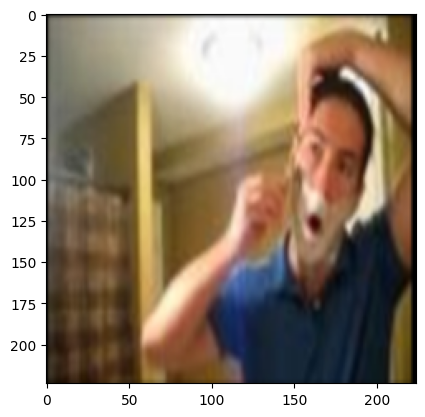

In [6]:
url = "shaving beard.png"
# response = requests.get(url)
# raw_image = Image.open(BytesIO(response.content)).convert("RGB")
raw_image = Image.open(url).convert("RGB")
raw_image = raw_image.resize((224, 224))
caption = "shopping mall"
# setup device to use
# load sample image
# raw_image = Image.open("docs/_static/merlion.png")
# we associate a model with its preprocessors to make it easier for inference.
# prepare the image
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
text_input = txt_processors["eval"](caption)
sample = {"image": image, "text_input": [text_input]}
plt.imshow(raw_image)



In [7]:
features_image = model.extract_features(sample, mode='image')

/home/cho092871/anaconda3/envs/lavis/lib/python3.11/site-packages/lavis/models/blip2_models/blip2.py:42: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast(dtype=dtype)


In [9]:
features_text = model.extract_features(sample, mode='text')

In [10]:
similarity = (features_image.image_embeds_proj @ features_text.text_embeds_proj[:,0,:].t()).max()
print(similarity)

tensor(0.1303, device='cuda:0')


In [11]:
feature_multimodal = model.extract_features(sample)

In [12]:
features_text['text_embeds'].shape

torch.Size([1, 4, 768])

In [13]:
similarity = (feature_multimodal.multimodal_embeds @ features_text.text_embeds[:,0,:].t()).max()
print(similarity)

tensor(5.0569, device='cuda:0')


In [14]:
model.generate(sample)

['a man shaving his face in the bathroom']

In [ ]:
image.dtype

torch.float32

: 

: 